# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


672c5b0cb47de038892e2fc704ed3fc7


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | lahad datu
Processing Record 5 of Set 1 | moree
Processing Record 6 of Set 1 | cidade velha
Processing Record 7 of Set 1 | remire-montjoly
Processing Record 8 of Set 1 | antofagasta
Processing Record 9 of Set 1 | bairnsdale
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | harstad
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | morant bay
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | nova sintra
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | kharkhorin
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | north bay
Processing Record 22 of Set 1 | thunder bay
Proce

Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | baise city
Processing Record 43 of Set 4 | natal
Processing Record 44 of Set 4 | minot
Processing Record 45 of Set 4 | badger
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | iskateley
Processing Record 48 of Set 4 | duartina
Processing Record 49 of Set 4 | malangali
Processing Record 0 of Set 5 | aasiaat
Processing Record 1 of Set 5 | kazerun
Processing Record 2 of Set 5 | manokwari
Processing Record 3 of Set 5 | troy
Processing Record 4 of Set 5 | hammerfest
Processing Record 5 of Set 5 | kulia village
City not found. Skipping...
Processing Record 6 of Set 5 | kandira
Processing Record 7 of Set 5 | prievidza
Processing Record 8 of Set 5 | bridgewater
Processing Record 9 of Set 5 | sungai penuh
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | canavieiras
Processing Record 12 of Set 5 | vetluga
Processing Record 13 of Set 5 | ouesso


Processing Record 32 of Set 8 | novoazovs'k
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | cartagena del chaira
Processing Record 35 of Set 8 | parabel'
Processing Record 36 of Set 8 | new norfolk
Processing Record 37 of Set 8 | pangody
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | howard springs
Processing Record 40 of Set 8 | carinhanha
Processing Record 41 of Set 8 | funafuti
Processing Record 42 of Set 8 | bartolome maso
City not found. Skipping...
Processing Record 43 of Set 8 | naigarhi
Processing Record 44 of Set 8 | yashikira
Processing Record 45 of Set 8 | marsh harbour
Processing Record 46 of Set 8 | kolonia
Processing Record 47 of Set 8 | tucuma
Processing Record 48 of Set 8 | dubovka
Processing Record 49 of Set 8 | usinsk
Processing Record 0 of Set 9 | mariinsk
Processing Record 1 of Set 9 | chipata
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of Set 9 | kenai
Processing Record 4 of Set 9 | shingu
Processing

Processing Record 21 of Set 12 | kavieng
Processing Record 22 of Set 12 | el matama
Processing Record 23 of Set 12 | laojunmiao
Processing Record 24 of Set 12 | ancud
Processing Record 25 of Set 12 | kenora
Processing Record 26 of Set 12 | adis zemen
Processing Record 27 of Set 12 | nandu
Processing Record 28 of Set 12 | miguel aleman (la doce)
City not found. Skipping...
Processing Record 29 of Set 12 | chonchi
Processing Record 30 of Set 12 | eirunepe
Processing Record 31 of Set 12 | greenville
Processing Record 32 of Set 12 | baymak
Processing Record 33 of Set 12 | mount pearl
Processing Record 34 of Set 12 | crane
Processing Record 35 of Set 12 | melioratorov
Processing Record 36 of Set 12 | abra pampa
Processing Record 37 of Set 12 | sidney
Processing Record 38 of Set 12 | fort bragg
Processing Record 39 of Set 12 | alotau
City not found. Skipping...
Processing Record 40 of Set 12 | mindif
Processing Record 41 of Set 12 | knin
Processing Record 42 of Set 12 | emmett
Processing Rec

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [8]:
# Display sample data
city_data_df.head(22)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,277.73,99,100,2.90,GS,1698622805
1,port elizabeth,-33.9180,25.5701,287.31,79,20,5.66,ZA,1698622829
2,constantia,44.1833,28.6500,285.53,72,0,3.49,RO,1698622842
3,lahad datu,5.0268,118.3270,300.23,81,92,0.29,MY,1698623060
4,moree,-29.4667,149.8500,300.30,30,0,6.98,AU,1698623060
5,cidade velha,14.9167,-23.6167,298.41,73,20,3.60,CV,1698623061
6,remire-montjoly,4.9167,-52.2667,301.17,83,0,2.06,GF,1698622869
7,antofagasta,-23.6500,-70.4000,290.75,75,17,2.68,CL,1698623061
8,bairnsdale,-37.8333,147.6167,295.40,44,100,2.24,AU,1698623061
9,jamestown,42.0970,-79.2353,282.05,96,100,2.06,US,1698622925


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(24)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,277.73,99,100,2.90,GS,1698622805
1,port elizabeth,-33.9180,25.5701,287.31,79,20,5.66,ZA,1698622829
2,constantia,44.1833,28.6500,285.53,72,0,3.49,RO,1698622842
3,lahad datu,5.0268,118.3270,300.23,81,92,0.29,MY,1698623060
4,moree,-29.4667,149.8500,300.30,30,0,6.98,AU,1698623060
5,cidade velha,14.9167,-23.6167,298.41,73,20,3.60,CV,1698623061
6,remire-montjoly,4.9167,-52.2667,301.17,83,0,2.06,GF,1698622869
7,antofagasta,-23.6500,-70.4000,290.75,75,17,2.68,CL,1698623061
8,bairnsdale,-37.8333,147.6167,295.40,44,100,2.24,AU,1698623061


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

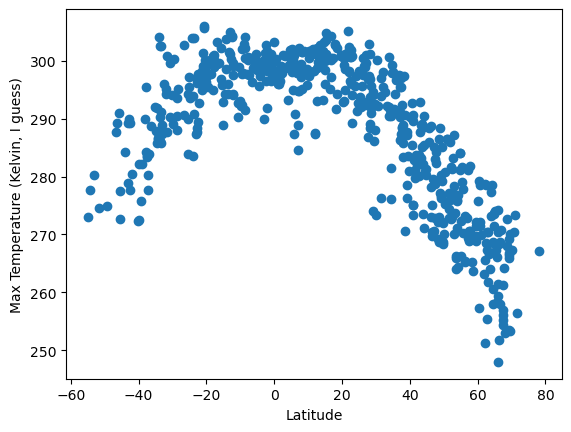

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin, I guess)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

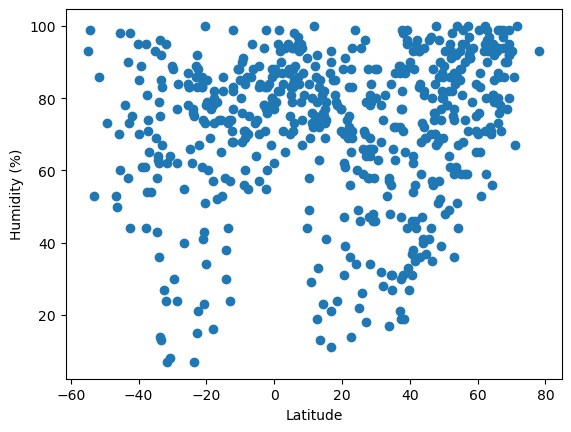

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

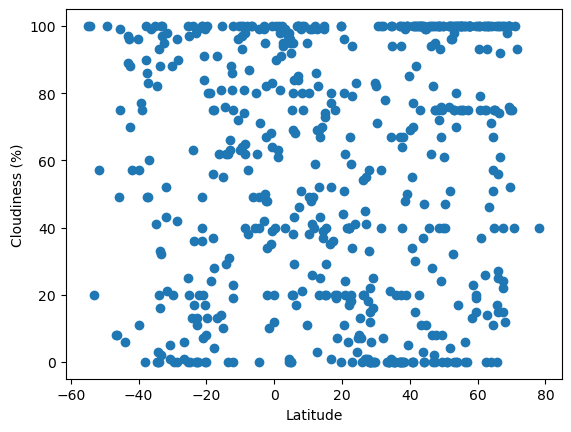

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

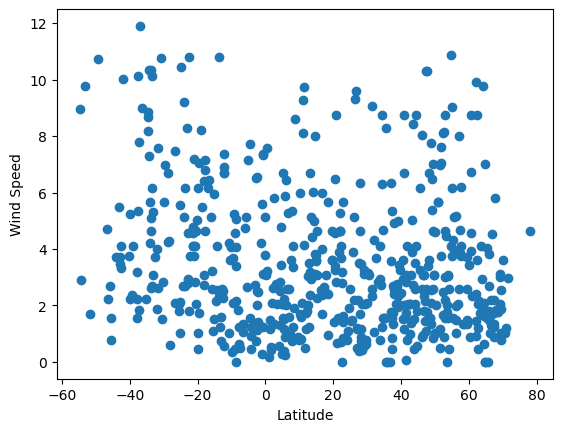

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head(13)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,constantia,44.1833,28.6500,285.53,72,0,3.49,RO,1698622842
3,lahad datu,5.0268,118.3270,300.23,81,92,0.29,MY,1698623060
5,cidade velha,14.9167,-23.6167,298.41,73,20,3.60,CV,1698623061
6,remire-montjoly,4.9167,-52.2667,301.17,83,0,2.06,GF,1698622869
9,jamestown,42.0970,-79.2353,282.05,96,100,2.06,US,1698622925
10,albany,42.6001,-73.9662,280.03,93,100,1.00,US,1698623062
11,harstad,68.7990,16.5293,272.68,90,98,0.89,NO,1698623062
13,morant bay,17.8815,-76.4093,302.94,85,75,2.45,JM,1698623062
14,stanley,54.8680,-1.6985,281.08,93,75,4.12,GB,1698623063


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head(11)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,277.73,99,100,2.90,GS,1698622805
1,port elizabeth,-33.9180,25.5701,287.31,79,20,5.66,ZA,1698622829
4,moree,-29.4667,149.8500,300.30,30,0,6.98,AU,1698623060
7,antofagasta,-23.6500,-70.4000,290.75,75,17,2.68,CL,1698623061
8,bairnsdale,-37.8333,147.6167,295.40,44,100,2.24,AU,1698623061
12,ushuaia,-54.8000,-68.3000,272.96,93,100,8.94,AR,1698622814
19,adamstown,-25.0660,-130.1015,295.51,83,97,5.55,PN,1698622820
28,puerto ayora,-0.7393,-90.3518,297.34,88,64,3.13,EC,1698623066
30,port-aux-francais,-49.3500,70.2167,274.92,73,100,10.74,TF,1698622888


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7610164472941405


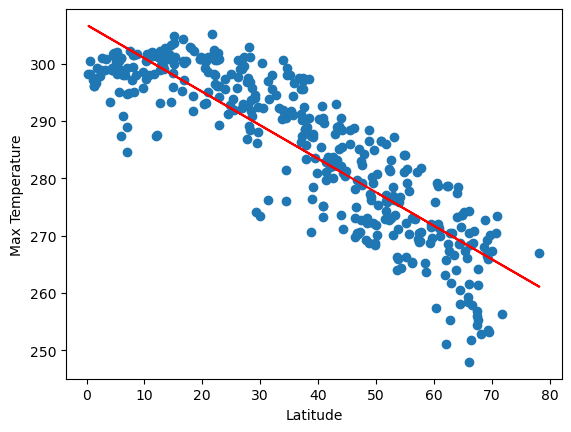

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.515361331305488


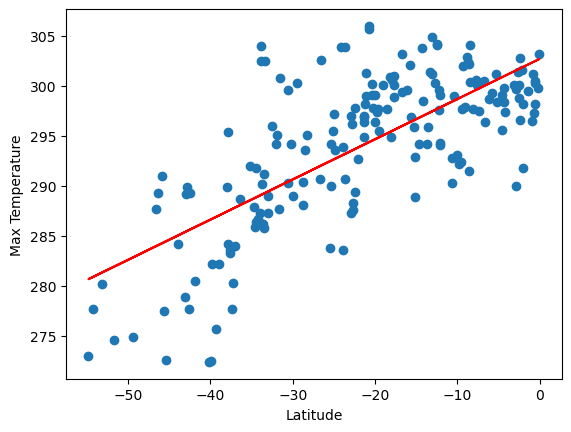

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.018801335113694362


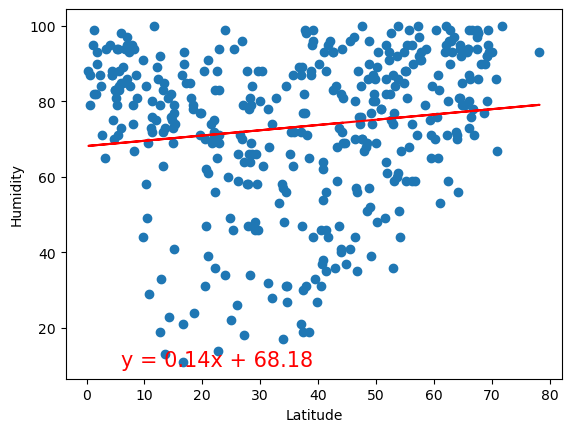

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0156224712682091


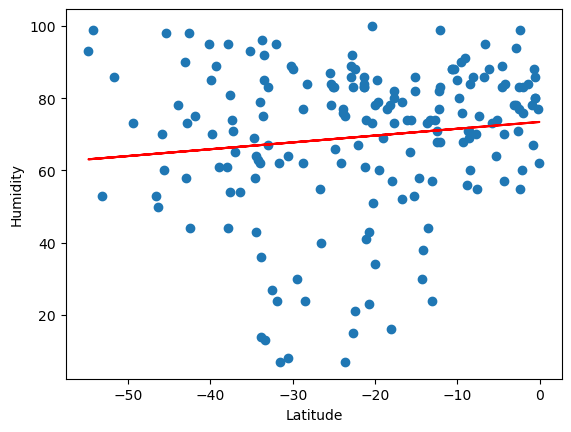

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Unlike temperature, there is no correlation for latitude and humidity; both hemispheres have an r-squared of less than 0.02. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.011965822149248123


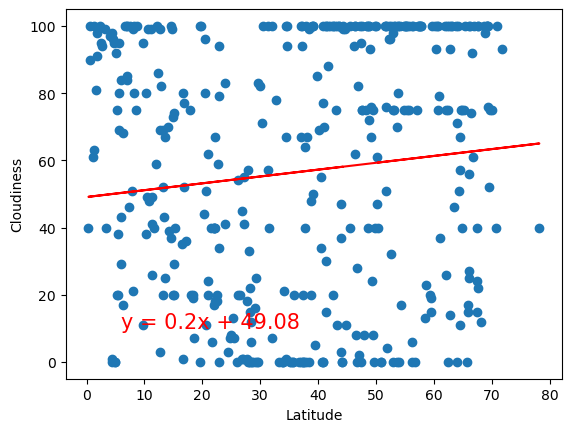

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0008908642431331787


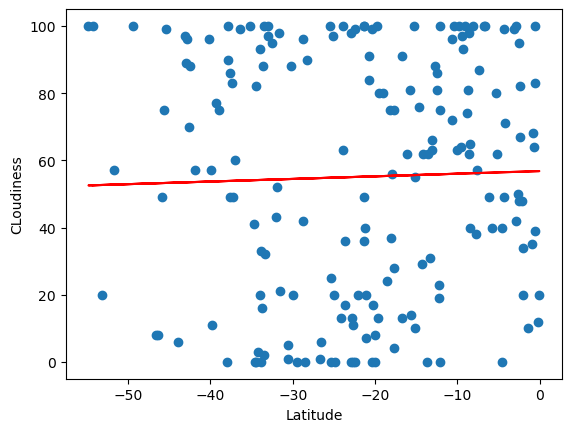

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('CLoudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Like humidity, there is no pattern here. In fact, the correlation is even lower, with the approximately 0.01 r-value for the northern hemisphere streets ahead of the southern hemisphere's findings of approximately 0.001. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.00025755466393953525


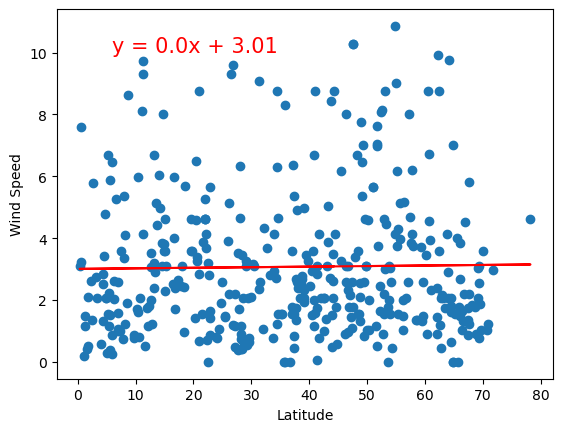

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.07502432244217695


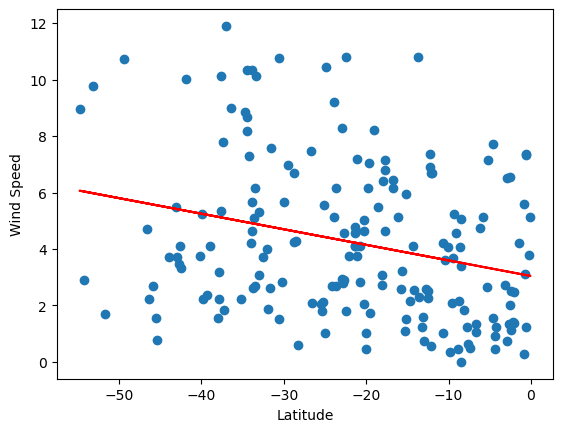

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Once again, there was no relationship between latitude and this variable of wind speed in the northern hemisphere. Still, the southern hemisphere showed something of a correlation; as latitude goes up, wind speed goes down. 